In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import os
import json

0.36


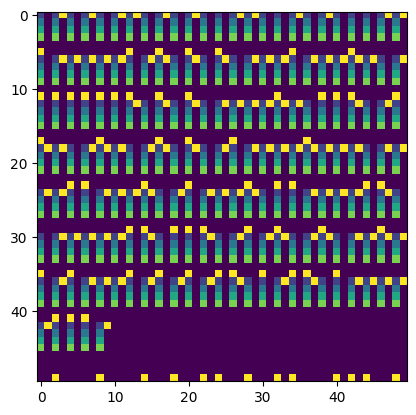

1.0


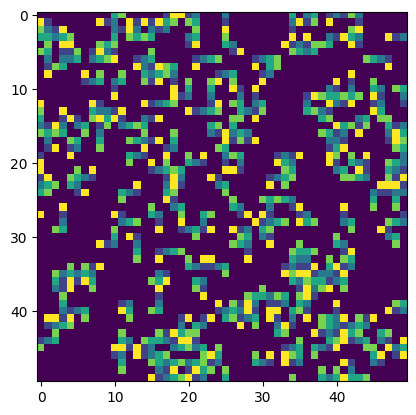

0.8666666666666667


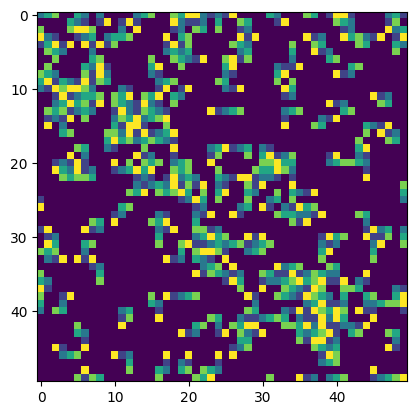

0.6944444444444444


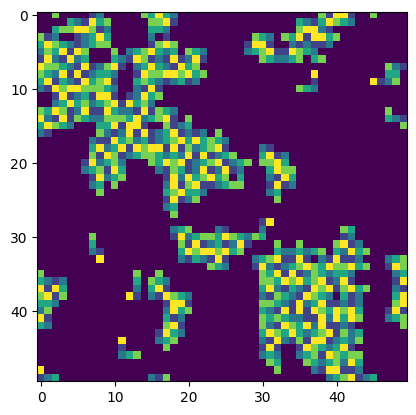

0.03888888888888889
0.0


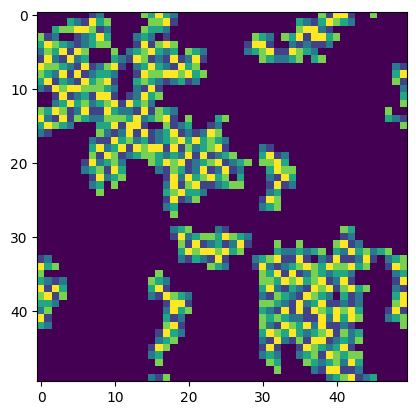

In [16]:


class Simulation:
    def __init__(self,  b_size=20, n_chains=0.5, chain_len=5):

        self.b_size = b_size
        self.board = np.zeros((b_size, b_size))
        self.chain_len = chain_len
        #self.density = density

        
        self.n_chains = n_chains
        self.positions = []
        self.mobility = []

        idx = 0
        while idx < self.n_chains:
            row = (len(self.positions)*2)//self.b_size
            for i in range(0,self.b_size, 2):
                chains_positions = [[row*(chain_len+1) + k, i] for k in range(0,chain_len)]
                if chains_positions[:][0] not in self.positions:
                    self.positions.append(chains_positions)
                    idx += 1
                if idx >= self.n_chains:
                    break
        unique_positions = []
        for position in self.positions:
            if position not in unique_positions:
                unique_positions.append(position)

        self.labeled_chains = {key: position for key, position in enumerate(unique_positions, 1)}

        self.update_board()
        self.density = 1 - len(np.where(self.board == 0)[0]) / self.b_size**2
        self.density_1 = (len(np.where(self.board != 0)[0])) / (self.b_size+1)**2





    def update_board(self):
        self.board = np.zeros((self.b_size, self.b_size))
        for key, positions in self.labeled_chains.items():
            for index, (x, y) in enumerate(positions):
                if index == 0:
                    # Initialize to a different value if it's the first one in the chain
                    self.board[x, y] = 5 + index
                else:
                    self.board[x, y] = index

    def free_spot_finder(self, coordinate):
        free_spots = []
        x, y = coordinate
        for s in [1, -1]:
            if self.board[(x + s) % self.b_size, y] == 0:
                free_spots.append([(x + s) % self.b_size, y])
            if self.board[x, (y + s) % self.b_size] == 0:
                free_spots.append([x, (y + s) % self.b_size])
        return free_spots

    def mobility_measurer(self):
        count = 0
        for positions in self.labeled_chains.values():
            x,y = positions[0]
            if len(self.free_spot_finder([x,y])) > 0:
                count += 1
        return count/len(self.labeled_chains)

    def step(self):
      for key, positions in self.labeled_chains.items():
        free_spots = self.free_spot_finder(positions[0])
        if free_spots:
          mov = random.choice(free_spots)
          self.board[positions[-1]] = 0
          positions[1:] = positions[0:-1]
          positions[0] = mov
        self.update_board()
      self.mobility.append(self.mobility_measurer())

    def evolution(self, num_of_iterations, show_progress_bar=False):
        if show_progress_bar:
            progress_bar = tqdm(range(num_of_iterations))
        else:
            progress_bar = range(num_of_iterations)

        for i in progress_bar:
            self.step()
            if self.mobility[-1] == 0:
                break

            if i==100 or i==300:
              plt.imshow(self.board)
              plt.show()
              print(s.mobility[-1])
            elif i%1000 == 0:
              plt.imshow(self.board)
              plt.show()
              print(s.mobility[-1])

s = Simulation(b_size=50, n_chains= 180, chain_len=5)
print(s.density)
plt.imshow(s.board)
s.evolution(10000)
plt.imshow(s.board)
print(s.mobility[-1])

In [38]:

# Define parameters
board_size = 20
num_iterations = 20000
density_vals = [k for k in range(1, 40, 4)]  # Modified density values
chain_l_vals = [3, 4]  # Modified chain lengths
num_simulations = 10  # Number of simulations to average

results = {}

# Iterate over chain lengths and density values
for chain_len in chain_l_vals:
    results[chain_len] = {}  # Initialize dictionary for current chain length
    for density in tqdm(density_vals, desc=f"Iterating over densities for chain_len {chain_len}"):
        mobility_list = []
        for _ in range(num_simulations):
            s = Simulation(b_size=board_size, n_chains=density, chain_len=chain_len)
            s.evolution(num_iterations)
            mobility_list.append(s.mobility[-1])
        
        # Calculate the average mobility for the current density and chain length
        avg_mobility = np.mean(mobility_list)
        d = Simulation(b_size=board_size, n_chains=density, chain_len=chain_len)
        results[chain_len][d.density] = avg_mobility

# Print or save the results as needed
print(results)


Iterating over densities for chain_len 4: 100%|██████████| 10/10 [12:31<00:00, 75.10s/it] 

{3: {0.007499999999999951: 1.0, 0.03749999999999998: 1.0, 0.0675: 1.0, 0.09750000000000003: 1.0, 0.12749999999999995: 1.0, 0.15749999999999997: 0.9952380952380953, 0.1875: 1.0, 0.21750000000000003: 0.9827586206896551, 0.24750000000000005: 0.9787878787878789, 0.27749999999999997: 0.818918918918919}, 4: {0.010000000000000009: 1.0, 0.050000000000000044: 1.0, 0.08999999999999997: 1.0, 0.13: 1.0, 0.17000000000000004: 0.8764705882352942, 0.20999999999999996: 0.7761904761904762, 0.25: 0.58, 0.29000000000000004: 0.19655172413793104, 0.32999999999999996: 0.21515151515151515, 0.37: 0.1810810810810811}}


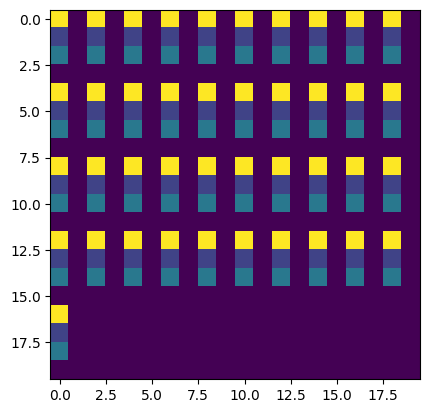

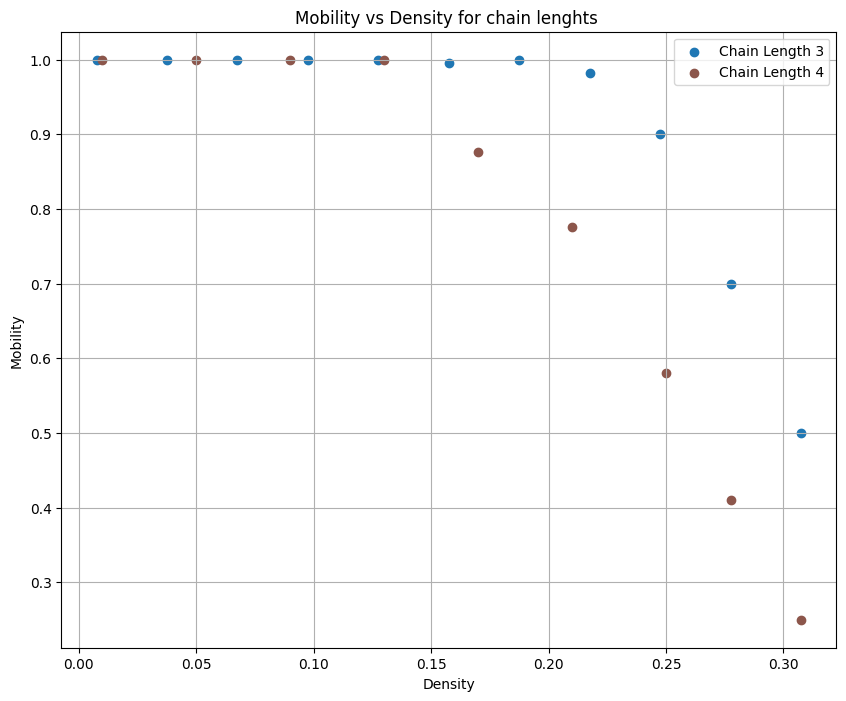

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap

plt.imshow(s.board)
# Example results dictionary structure for demonstration
# results = { chain_len: {density: mobility_list, ...}, ... }
# Assuming results is already defined in your environment

# Define the function
def func(rho):
    return +1 - np.power(rho, 4)
def func_2(rho):

    return 1 - np.power(rho, 3)

# Set up the figure and axes
plt.figure(figsize=(10, 8))
plt.title("Mobility vs Density for chain lenghts ")
plt.xlabel("Density")
plt.ylabel("Mobility")

# Get a colormap
cmap = get_cmap('tab10')  # You can choose other colormaps if you prefer

# Create a dictionary to map chain lengths to colors
chain_lens = sorted(results.keys())
colors = {chain_len: cmap(i / len(chain_lens)) for i, chain_len in enumerate(chain_lens)}

# Plot the function
#rho_values = np.linspace(0.0, 0.6, 100)
#plt.plot(rho_values, func(rho_values), label="Theoretical Function", linestyle='--', color='black')
#plt.plot(rho_values, func_2(rho_values), label="Theoretical Function", linestyle='--', color='black')

# Iterate through results and plot data
for chain_len, density_dict in results.items():
    color = colors[chain_len]
    for density, mobility in density_dict.items():
        mean_mobility = np.mean(mobility)
        #mean_mobility = mobility[-1]
        
        plt.scatter(density, mean_mobility, marker='o', color=color, label=f"Chain Length {chain_len}")#, time {num_iteration}")

# Create a custom legend to avoid duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid(True)

# Show the plot
plt.show()


In [113]:
with open('results_3.json', 'w') as f:
    json.dump(results, f)